In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
DF=pd.read_csv("Salary by Education.csv")

In [7]:
DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree Level  504 non-null    object
 1   Nationality   504 non-null    object
 2   Gender        504 non-null    object
 3   Year Quarter  504 non-null    object
 4   Salary        504 non-null    int64 
 5   Currency      504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


In [11]:
DF.head()

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR
2,Primary,Saudi,Female,2017 Q1,4172,SAR
3,Primary,Saudi,Male,2017 Q1,6172,SAR
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR


In [14]:
#explore The Data

In [17]:
DF.shape

(504, 6)

In [19]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Salary,504.0,8950.031746,6372.635277,1331.0,4194.0,7890.5,12448.75,35622.0


In [21]:
DF['Gender'].value_counts()

Male      252
Female    252
Name: Gender, dtype: int64

In [23]:
DF['Degree Level'].value_counts()

Bachelor         72
Doctorate        72
Intermediate     72
Master Degree    72
Secondary        72
Primary          72
Diploma          72
Name: Degree Level, dtype: int64

In [25]:
DF['Nationality'].value_counts()

NonSaudi    252
Saudi       252
Name: Nationality, dtype: int64

In [28]:
print(DF.agg({'Salary': ['min', 'max', 'mean', 'median']}))

              Salary
min      1331.000000
max     35622.000000
mean     8950.031746
median   7890.500000


In [30]:
DF['Currency'].value_counts()


SAR    504
Name: Currency, dtype: int64

In [32]:
DF['Year Quarter'].value_counts()

2020 Q3    28
2020 Q2    28
2018 Q2    28
2021 Q1    28
2021 Q2    28
2017 Q4    28
2018 Q3    28
2017 Q2    28
2020 Q1    28
2019 Q3    28
2017 Q1    28
2019 Q1    28
2019 Q2    28
2017 Q3    28
2020 Q4    28
2018 Q4    28
2019 Q4    28
2018 Q1    28
Name: Year Quarter, dtype: int64

In [34]:
##Cleaning Data

In [36]:
##Check missing value

In [38]:
DF.isnull().sum()

Degree Level    0
Nationality     0
Gender          0
Year Quarter    0
Salary          0
Currency        0
dtype: int64

In [40]:
DF.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

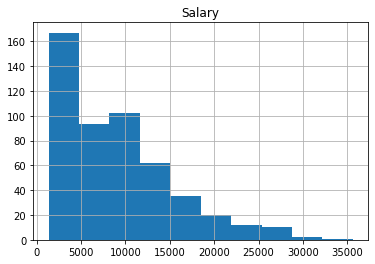

In [42]:
DF.hist()

In [50]:
SalarybyDegree =  DF.groupby('Degree Level')['Salary'].mean()
SD=pd.DataFrame(SalarybyDegree)
SD.reset_index(inplace=True)
SD

,Degree Level,Salary
0,Bachelor,9535.555556
1,Diploma,7036.694444
2,Doctorate,19835.458333
3,Intermediate,4101.527778
4,Master Degree,13797.875000
5,Primary,3569.041667
6,Secondary,4774.069444


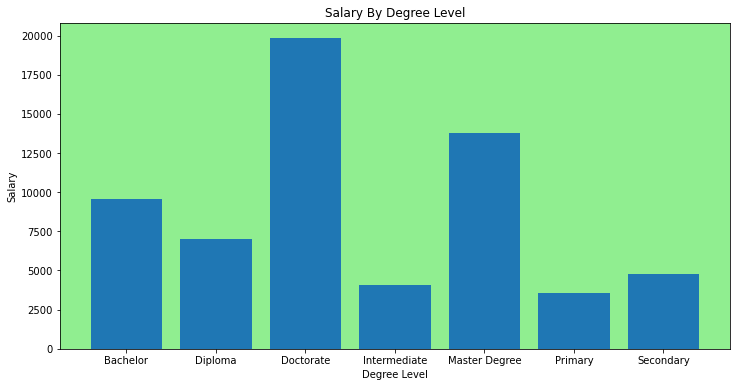

In [97]:

plt.figure(figsize=(12,6))

plt.bar(SD['Degree Level'],SD['Salary'])
plt.title("Salary By Degree Level")

X=plt.xlabel("Degree Level")
Y=plt.ylabel("Salary")



In [103]:
x=DF.groupby('Gender')['Salary'].mean()
GS=pd.DataFrame(x)
GS.reset_index(inplace=True)
GS

,Gender,Salary
0,Female,7664.559524
1,Male,10235.503968


([<matplotlib.patches.Wedge at 0x26e4e6d9910>,
 [Text(0.2460707982302205, 1.0721236692930263, 'Female'),
  Text(-0.24607059747129198, -1.0721237153706291, 'Male')],
 [Text(0.13422043539830206, 0.584794728705287, '42.8%'),
  Text(-0.13422032589343197, -0.5847947538385249, '57.2%')])

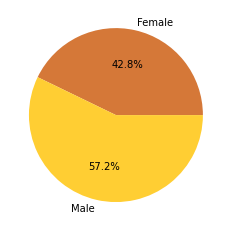

In [111]:
colorPalette=["#D57838","#FFCE33"]
plt.pie(GS['Salary'],labels=GS['Gender'],autopct="%1.1f%%",colors=colorPalette)

In [113]:
##Nationality Vs Salary

In [117]:
Y=DF.groupby('Nationality')['Salary'].mean()
NS=pd.DataFrame(Y)
NS.reset_index(inplace=True)
NS

,Nationality,Salary
0,NonSaudi,6663.587302
1,Saudi,11236.476190


([<matplotlib.patches.Wedge at 0x26e4dde1d90>,
 [Text(0.429664616678769, 1.0126145945888232, 'NonSaudi'),
  Text(-0.4296646166787691, -1.0126145945888232, 'Saudi')],
 [Text(0.2343625181884194, 0.5523352334120853, '37.2%'),
  Text(-0.23436251818841947, -0.5523352334120852, '62.8%')])

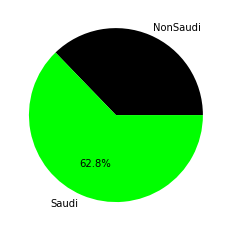

In [121]:
colorPalette=["#000000","#00FF00"]
plt.pie(NS['Salary'],labels=NS['Nationality'],autopct="%1.1f%%",colors=colorPalette)

In [123]:
##Salary Vs Quarter year

In [128]:
z=DF.groupby(['Year Quarter'])['Salary'].mean()
YS=pd.DataFrame(z)
YS.reset_index(inplace=True)
YS

,Year Quarter,Salary
0,2017 Q1,8777.821429
1,2017 Q2,8644.857143
2,2017 Q3,8622.250000
3,2017 Q4,8427.678571
4,2018 Q1,8551.678571
5,2018 Q2,9013.642857
6,2018 Q3,9062.928571
7,2018 Q4,8576.964286
8,2019 Q1,8865.107143
9,2019 Q2,9189.892857


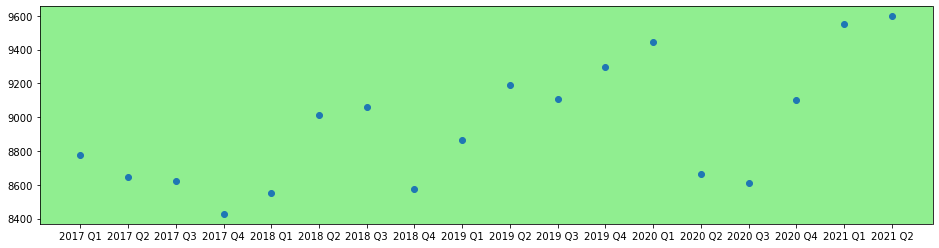

In [137]:


plt.figure(figsize=(16,4))

plt.scatter(YS['Year Quarter'], YS['Salary'])